## Whit this note can do? 
- collecting figures that can be used for the manuscirpt. 

In [4]:
#Pkg.add("Pkg"); import Pkg; 
ENV["LD_LIBRARY_PATH"] = ""
using Pkg
using Distributed
using DelimitedFiles
using Distances
using StatsBase  # StatsBase.mode
using CSV
using Profile    
using Random
using Statistics
using LinearAlgebra
using KernelDensity
using Printf
using Measures
using LaTeXStrings;
using Plots
using DataFrames
using StatsPlots
rng = Random.MersenneTwister(1234);

Plots.default(grid =:false, fontfamily="Computer Modern", 
labelfontsize=12, tickfontsize=12, legendfontsize=12, markerstrokewidth=0, ms=5, 
foreground_color_legend = nothing);

In [ ]:
include("../src/my_HIV_data_cleanign.jl")
include("../src/figure.jl");

In [5]:
const pxl2pt = 0.75;
α_gen_dbl = 83 * 0.5
α_gen_sgl = 83
α_lbl_dbl = 55.4 * 0.5
α_lbl_sgl = 55.4;
my_margin = 5mm;

In [5]:


Alpha_set_temp = ["-","A","C","D","E","F","G","H","I","K","L","M","N","P","Q","R","S","T","V","W","Y", "*"];
Alpha_Dic_temp = Dict( "-"=>1,"A"=>2,"C"=>3,"D"=>4,"E"=>5,
	"F"=>6,"G"=>7,"H"=>8,"I"=>9,"K"=>10,"L"=>11,
	"M"=>12,"N"=>13,"P"=>14,"Q"=>15,"R"=>16,"S"=>17,"T"=>18,"V"=>19,"W"=>20, "Y"=>21, "*"=>22);
NUC = ["-", "A", "C", "G", "T"];
q = length(NUC);
AA_set = ["-", "A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y", "*"];
AA2NUM = Dict(AA_set[i] => i for i in 1:length(AA_set));
q_AA = length(AA_set);

In [6]:
fname_key_human_and_RMs = ["703010505", "RM5695", "RM6070", "RM6072", "RM6697", "RM6699", "RM6701", "RM6703"];
n_RMs_max = length(fname_key_human_and_RMs)
n_len_H_RMs = length(fname_key_human_and_RMs);
csv_raw_CH505 = DataFrame(CSV.File("../out/703010505-3-poly_sorted_with_mutant.csv"));
csv_raw_RMs_merged = DataFrame(CSV.File("../out/RMs-merged-3-poly_sorted_with_mutant_CH505.csv"));

seq_raw = readdlm("../data/mpl/703010505-3-poly-seq2state.dat");
time_temp = copy(seq_raw[:,1])
time_unique = Int.(sort(unique(time_temp)));

## Making Trajecotry plots 

In [38]:
L_fig_tot = 1_200
idx_CTL = [extract_integer(x) ∈ 409:418 for x in csv_raw_CH505.mutants_AA_fr3 ]
(plot_traject, time_unique, x1_CTL, x1_CH103, x1_CH235, x1_autologous, x1_glycan) = get_trajectory_plot_CH505_with_glycan(csv_raw_CH505, L_fig_tot);

(plot_selection_vs_time, time_CTL, time_CH103, time_CH235, time_autologous, time_glycan, 
selection_CTL, selection_CH103, selection_CH235, selection_autologous, selection_glycan, 
name_mutation_CTL, name_mutation_CH103, name_mutation_CH235, name_mutation_strain_specific, name_mutation_glycan) = get_selection_vs_time_plot_CH505_with_glycan(csv_raw_CH505, L_fig_tot);

(plot_violin_plot, s_res_CH103, s_res_CH235, s_res_spcfc, s_res_glycan, s_res_CTL) = get_violin_plot_CH505_with_glycan(csv_raw_CH505, L_fig_tot);

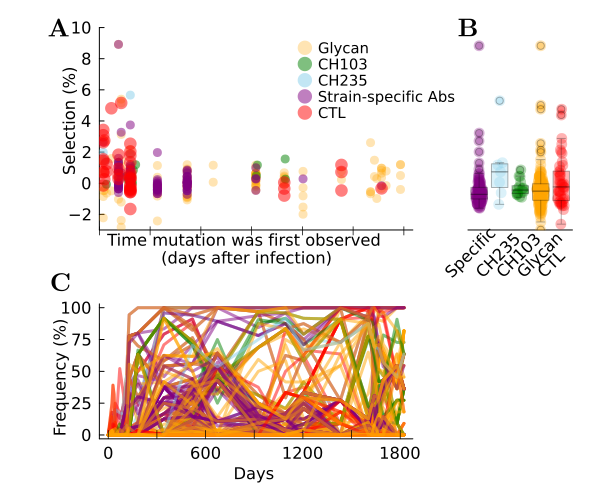

In [39]:
l = @layout [
    a{0.75w, 0.6h} b{0.25w, 0.6h}
    c{0.75w, 0.4h} _]
Plots.plot(plot_selection_vs_time, plot_violin_plot, 
            plot_traject, layout=l, size=(L_fig_tot*0.5,500))
#Plots.savefig("../fig/trajecory_selection_CH505.pdf")

In [40]:
flat_x1_CTL = [item for sublist in x1_CTL for item in sublist]
flat_time_CTL = [item for sublist in x1_CTL for item in time_unique]
flat_id_CTL = [@sprintf("CTL.%d", n) for n in 1:size(x1_CTL,1) for i in time_unique]
#
flat_x1_CH103 = [item for sublist in x1_CH103 for item in sublist]
flat_time_CH103 = [item for sublist in x1_CH103 for item in time_unique]
flat_id_CH103 = [@sprintf("CH103.%d", n) for n in 1:size(x1_CH103,1) for i in time_unique]
#
flat_x1_CH235 = [item for sublist in x1_CH235 for item in sublist]
flat_time_CH235 = [item for sublist in x1_CH235 for item in time_unique]
flat_id_CH235 = [@sprintf("CH235.%d", n) for n in 1:size(x1_CH235,1) for i in time_unique]
#
flat_x1_autologous = [item for sublist in x1_autologous for item in sublist]
flat_time_autologous = [item for sublist in x1_autologous for item in time_unique];
flat_id_autologous = [@sprintf("autologous.%d", n) for n in 1:size(x1_autologous,1) for i in time_unique];
#
flat_x1_glycan = [item for sublist in x1_glycan for item in sublist]
flat_time_glycan = [item for sublist in x1_glycan for item in time_unique];
flat_id_glycan = [@sprintf("glycan.%d", n) for n in 1:size(x1_glycan,1) for i in time_unique];

In [41]:
# -------- Export the data for Fig3A, the selection vs time plot -------#
df = DataFrame( 
    id=[flat_id_CTL; flat_id_CH103; flat_id_CH235; flat_id_autologous; flat_id_glycan], 
    time=[flat_time_CTL; flat_time_CH103; flat_time_CH235; flat_time_autologous; flat_time_glycan], 
    frequency=[flat_x1_CTL; flat_x1_CH103; flat_x1_CH235; flat_x1_autologous; flat_x1_glycan], 
);
#CSV.write("../out/for_figures/fig3C_trajectory.csv", df); 

In [42]:
df = DataFrame(
    category=[repeat(["CTL"], length(time_CTL)); repeat(["CH103"], length(time_CH103));
     repeat(["CH235"], length(time_CH235)); repeat(["autologous"], length(time_autologous)); 
        repeat(["glycan"], length(time_glycan))], 
    mutation=[name_mutation_CTL; name_mutation_CH103;
     name_mutation_CH235; name_mutation_strain_specific; name_mutation_glycan], 
    time=[time_CTL; time_CH103; time_CH235; time_autologous; time_glycan], 
    selection=[selection_CTL; selection_CH103; selection_CH235; selection_autologous; selection_glycan] );
#CSV.write("../out/for_figures/fig3A_selection_vs_time.csv", df); 

## Compare Fitness landscape of RMs and CH505 

In [43]:
csv_raw_CH505 = DataFrame(CSV.File("../data/mpl/SHIV.CH505_AA/703010505-poly.csv"));
poly_idx_CH505 =  DataFrame(CSV.File("../data/mpl/SHIV.CH505_AA/index-703010505.csv"));
poly_idx_RMs = DataFrame(CSV.File("../data/mpl/SHIV.CH505_AA/index-RMs-poly.csv"));

csv_raw_RMs_merged = DataFrame(CSV.File("../data/mpl/SHIV.CH505_AA/RMs-poly.csv"));
n_H_RMs = length(fname_key_human_and_RMs);

fname_dev = ["RM5695", "RM6070", "RM6072"]
marker_set_with_human = ["circle", "circle", "circle", "circle", "utriangle", "utriangle", "utriangle", "utriangle"];

## Compare fitness landscapes of CH505 and jointed SHIV.CH505

In [51]:
dir_name = "../data/mpl/SHIV.CH505_AA/"
(fitness_ind_tot_CH505_random_set, fitness_ind_tot_RMs_random_set, 
 mean_fitness_ind_tot_CH505_random_set, mean_fitness_ind_tot_RMs_random_set,     
 errorbar_tot_CH505_set, errorbar_tot_RMs_set, 
 date_unique_set, bool_BNB_nonBNB) = get_compare_fitness(fname_key_human_and_RMs, fname_dev, dir_name, 
                        csv_raw_CH505, csv_raw_RMs_merged; flag_include_HIV=false, flag_shuffle = false);



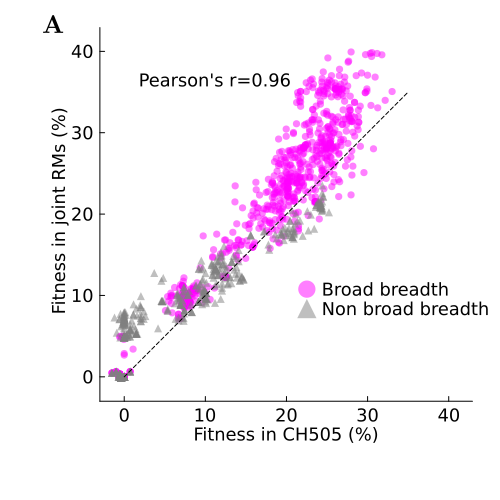

In [52]:
L_fig = 500
fontsize_reg = Int(ceil((2*L_fig)/α_gen_sgl * pxl2pt * (1.0/0.8))) # because we rescale these figures
fontsize_label_reg = Int(ceil((2*L_fig)/α_lbl_sgl * pxl2pt* (1.0/0.8)))
my_alpha = 0.5

fitness_ind_tot_CH505_random_set_vec = copy(reduce(vcat, fitness_ind_tot_CH505_random_set))
fitness_ind_tot_RMs_random_set_vec = copy(reduce(vcat, fitness_ind_tot_RMs_random_set))

max_x = maximum([maximum(fitness_ind_tot_CH505_random_set_vec), maximum(fitness_ind_tot_RMs_random_set_vec)]) + 3
p1tot = scatter(fitness_ind_tot_CH505_random_set_vec[Bool.(bool_BNB_nonBNB)], 
            fitness_ind_tot_RMs_random_set_vec[Bool.(bool_BNB_nonBNB)],
            label="Broad breadth", 
            c=:magenta, 
            alpha=my_alpha,
            foreground_color_legend = nothing,
            labelfontsize=fontsize_reg,
            xlim=(-3, max_x), 
            ylim=(-3, max_x), 
            markerstrokewidth=0,
            grid=:false,
            m = :circle,
            margin=my_margin, 
            xlabel="Fitness in CH505 (%)\n ", 
            ylabel=" \n Fitness in joint RMs (%)",
            legend=(0.6, 0.3),
            legendfontsize=fontsize_reg, 
            tickfontsize=fontsize_reg,
)
scatter!(fitness_ind_tot_CH505_random_set_vec[.!Bool.(bool_BNB_nonBNB)], 
            fitness_ind_tot_RMs_random_set_vec[.!Bool.(bool_BNB_nonBNB)],
            label="Non broad breadth", 
            c=:gray, 
            alpha=my_alpha,
            foreground_color_legend = nothing,
            labelfontsize=fontsize_reg,
            xlim=(-3, max_x), 
            ylim=(-3, max_x), 
            markerstrokewidth=0,
            legend=(0.6, 0.3),
            m =:utriangle,
)
pearson_cor = cor(fitness_ind_tot_CH505_random_set_vec, fitness_ind_tot_RMs_random_set_vec);
annotate!(2, max_x*0.85, text(@sprintf("Pearson's r=%.2f", pearson_cor), 
        fontsize_reg, :left, rotation=0, color=:black))
Plots.plot!(p1tot[1], collect(0:35), collect(0:35), sybplot=1, c="black", linestyle=:dash, label=:false)
annotate!(-10, max_x*1.01, text(L"\textbf{A}", :left, fontsize_label_reg))

Plots.plot(p1tot, size=(L_fig, L_fig))


In [53]:
# -------- Export the data for Fig4A, comparison of CH505 and jointed RMs fitness landscapes  -------#
df = DataFrame( F_CH505 = fitness_ind_tot_CH505_random_set_vec,
                F_jointedRMs = fitness_ind_tot_RMs_random_set_vec,
                breadth = bool_BNB_nonBNB );
#CSV.write("../out/for_figures/fig4A_fitness_comparison.csv", df); 

### Shuffled sequences 

In [233]:
dir_name = "../data/mpl/SHIV.CH505_AA/"
(fitness_ind_tot_CH505_shuffle_set, fitness_ind_tot_RMs_shuffle_set, 
 mean_fitness_ind_tot_CH505_shuffle_set, mean_fitness_ind_tot_RMs_shuffle_set,     
 errorbar_tot_CH505_shuffle_set, errorbar_tot_RMs_shuffle_set, 
    date_unique_set_shuffle, bool_BNB_nonBNB_shuffle) = get_compare_fitness(fname_key_human_and_RMs, fname_dev, dir_name, 
                        csv_raw_CH505, csv_raw_RMs_merged; flag_include_HIV=false, flag_shuffle = true);

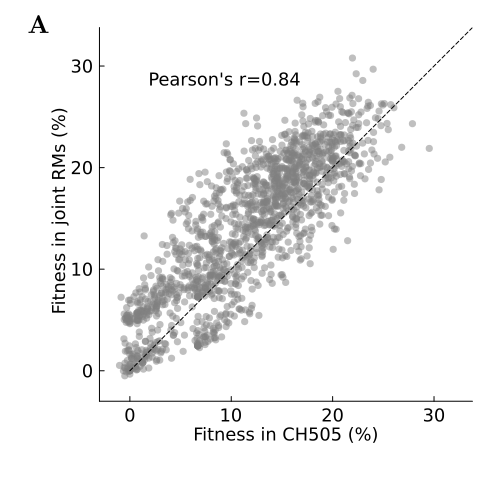

In [55]:
L_fig = 500
fontsize_reg = Int(ceil((2*L_fig)/α_gen_sgl * pxl2pt * (1.0/0.8))) # because we rescale these figures
fontsize_label_reg = Int(ceil((2*L_fig)/α_lbl_sgl * pxl2pt* (1.0/0.8)))
my_alpha = 0.5

fitness_ind_tot_CH505_shuffle_set_vec = copy(reduce(vcat, fitness_ind_tot_CH505_shuffle_set))
fitness_ind_tot_RMs_shuffle_set_vec = copy(reduce(vcat, fitness_ind_tot_RMs_shuffle_set))

max_x = maximum([maximum(fitness_ind_tot_CH505_shuffle_set_vec), maximum(fitness_ind_tot_RMs_shuffle_set_vec)]) + 3
p1tot = scatter(fitness_ind_tot_CH505_shuffle_set_vec[Bool.(bool_BNB_nonBNB_shuffle)], 
            fitness_ind_tot_RMs_shuffle_set_vec[Bool.(bool_BNB_nonBNB_shuffle)],
            legend=:false,
            c=:gray, 
            alpha=my_alpha,
            foreground_color_legend = nothing,
            labelfontsize=fontsize_reg,
            xlim=(-3, max_x), 
            ylim=(-3, max_x), 
            markerstrokewidth=0,
            grid=:false,
            m = :circle,
            margin=my_margin, 
            xlabel="Fitness in CH505 (%)\n ", 
            ylabel=" \n Fitness in joint RMs (%)",
            legendfontsize=fontsize_reg, 
            tickfontsize=fontsize_reg,
)
scatter!(fitness_ind_tot_CH505_shuffle_set_vec[.!Bool.(bool_BNB_nonBNB_shuffle)], 
            fitness_ind_tot_RMs_shuffle_set_vec[.!Bool.(bool_BNB_nonBNB_shuffle)],
            legend=:false,
            c=:gray, 
            alpha=my_alpha,
            foreground_color_legend = nothing,
            labelfontsize=fontsize_reg,
            xlim=(-3, max_x), 
            ylim=(-3, max_x), 
            markerstrokewidth=0,
            m =:circle,
)
pearson_cor = cor(fitness_ind_tot_CH505_shuffle_set_vec, fitness_ind_tot_RMs_shuffle_set_vec);
annotate!(2, max_x*0.85, text(@sprintf("Pearson's r=%.2f", pearson_cor), 
        fontsize_reg, :left, rotation=0, color=:black))
Plots.plot!(p1tot[1], collect(0:35), collect(0:35), sybplot=1, c="black", linestyle=:dash, label=:false)
annotate!(-10, max_x*1.01, text(L"\textbf{A}", :left, fontsize_label_reg))

Plots.plot(p1tot, size=(L_fig, L_fig))


In [56]:
# -------- Export the data for Fig4A, comparison of CH505 and jointed RMs fitness landscapes  -------#
df = DataFrame( F_CH505 = fitness_ind_tot_CH505_shuffle_set_vec,
                F_jointedRMs = fitness_ind_tot_RMs_shuffle_set_vec,
                breadth = bool_BNB_nonBNB_shuffle );
#CSV.write("../out/for_figures/figS3A_fitness_comparison_using_shuffled_seq.csv", df); 

## Fitness change Plots 

α_dev=0.214 α_undev=0.062 


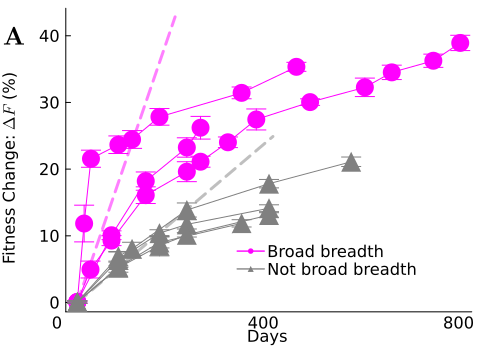

In [71]:
# This figure would be double column
n_H_RMs = length(fname_key_human_and_RMs)
k = 1
L_fig_tot = 1200
L_fig = Int(0.4*L_fig_tot)
fontsize_reg = Int(ceil(L_fig_tot/α_gen_sgl * pxl2pt))
fontsize_label_reg = Int(ceil(L_fig_tot/α_lbl_sgl * pxl2pt))

my_ms = 10
α_lin_dev = linreg(date_unique_set[k][1:4], mean_fitness_ind_tot_RMs_random_set[k][1:4])
for k_temp in 2:4 α_lin_dev += linreg(date_unique_set[k_temp][1:4], mean_fitness_ind_tot_RMs_random_set[k_temp][1:4]) end

α_lin_undev = linreg(date_unique_set[4][1:3], mean_fitness_ind_tot_RMs_random_set[4][1:3])
for k_temp in 5:7 α_lin_undev += linreg(date_unique_set[k_temp][1:3], mean_fitness_ind_tot_RMs_random_set[k_temp][1:3]) end

α_lin_dev /= 3; α_lin_undev /= 4
@printf("α_dev=%.3f α_undev=%.3f \n", α_lin_dev, α_lin_undev)

p = Plots.plot(collect(0:100:250), α_lin_dev*collect(0:100:250), linestyle=:dash, c=:magenta, label=:false, lw=3, alpha=0.5)
Plots.plot!(collect(0:100:400), α_lin_undev*collect(0:100:400), linestyle=:dash, c=:gray, label=:false, lw=3, alpha=0.5)

plot!(date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], 
#    m=Symbol(marker_set_with_human[k]), label=fname_key_human_and_RMs[k],     
    m=Symbol(marker_set_with_human[k+1]), label="Broad breadth",
    yerror=errorbar_tot_RMs_set[k],
    markerstrokecolor="magenta",
    c="magenta",
    size=(L_fig,Int(350)),
    foreground_color_legend = nothing,
    labelfontsize=fontsize_reg,
    grid=:false,
    margin=0.1mm, 
    ms=my_ms,
    xlabel=" \n ", 
    ylabel=" \n ", 
    xticks=:false,
#    xlim=(-10, 900),
    legend=(0.5, 0.2),
#    legend=:false,
    legendfontsize=fontsize_reg, 
    tickfontsize=fontsize_reg,
)
annotate!(-140, 6, text(L"Fitness Change: $ΔF$ (%)", fontsize_reg, :left, rotation=90))
annotate!(350, -5, text("Days", fontsize_reg, :left))
[annotate!(i-50, -3, text(string(i), fontsize_reg, :left)) for i in [0, 400, 800]]

for k in 2:(n_H_RMs-1)
    key_RM = fname_key_human_and_RMs[k+1]
    this_c = "gray"
    if(key_RM ∈ fname_dev) this_c = "magenta" end
#    if(key_RM == "RM6072") this_c = "pink" end
    if(k==4)
        plot!(p[1], date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], ms=my_ms,
            yerror=errorbar_tot_RMs_set[k], markerstrokecolor=this_c,
            sbuplot=1, m=Symbol(marker_set_with_human[k+1]), label="Not broad breadth", c=this_c)
    end
    if(k!=4)
        plot!(p[1], date_unique_set[k], mean_fitness_ind_tot_RMs_random_set[k], ms=my_ms,
            yerror=errorbar_tot_RMs_set[k], markerstrokecolor=this_c,
            sbuplot=1, m=Symbol(marker_set_with_human[k+1]), label=:false, c=this_c)
    end
end
#display(p);
annotate!(-150, 40, text(L"\textbf{A}", :left, fontsize_label_reg))
#Plots.savefig("../fig/CH505/fitness_change_mutations_left_fig.pdf")




In [104]:
dir_name = "../data/mpl/SHIV.CH505_AA/"

##Note this function exclude HIV because the flag_include_HIV is off.
(fitness_ind_tot_CH505_random_set, fitness_ind_tot_RMs_random_set, 
 mean_fitness_ind_tot_CH505_random_set, mean_fitness_ind_tot_RMs_random_set,     
 errorbar_tot_CH505_set, errorbar_tot_RMs_set, 
    date_unique_set, bool_BNB_nonBNB) = get_compare_fitness(fname_key_human_and_RMs, fname_dev, dir_name, 
                        csv_raw_CH505, csv_raw_RMs_merged; flag_include_HIV=false, flag_shuffle = false);

#RM_id = [@sprintf("RM%d", k) for k in 1:size(date_unique_set,1) for _ in date_unique_set[k]]
RM_id = [fname_key_human_and_RMs[k+1] for k in 1:size(date_unique_set,1) for _ in date_unique_set[k]]
#breadth = [x ∈ ["RM1", "RM2", "RM3"]  for x in RM_id ]
breadth = [x ∈ fname_key_human_and_RMs[1:4]  for x in RM_id ]
date = [item for sublist in date_unique_set for item in sublist]
mean_F = [item for sublist in mean_fitness_ind_tot_RMs_random_set for item in sublist]
std_F = [item for sublist in errorbar_tot_RMs_set for item in sublist];
#"""
# --- Adding CH505's data --- #
dir_name = "../data/mpl/SHIV.CH505_AA/"
(fitness_ind_tot_CH505_random_set, fitness_ind_tot_RMs_random_set, 
 mean_fitness_ind_tot_CH505_random_set, mean_fitness_ind_tot_RMs_random_set,     
 errorbar_tot_CH505_set, errorbar_tot_RMs_set, 
    date_unique_set, bool_BNB_nonBNB) = get_compare_fitness(fname_key_human_and_RMs, fname_dev, dir_name, 
                        csv_raw_CH505, csv_raw_RMs_merged; flag_include_HIV=true, flag_shuffle = false);

RM_id = [copy(RM_id); ["CH505" for _ in date_unique_set[1]]]    
breadth = [copy(breadth); [true for _ in date_unique_set[1]]]
date = [copy(date); date_unique_set[1]]
mean_F = [copy(mean_F); mean_fitness_ind_tot_CH505_random_set[1]]
std_F = [copy(std_F); errorbar_tot_CH505_set[1]];
#"""

df = DataFrame(
RM_id = RM_id,
breadth = breadth,
date = date,
mean_F = mean_F,
std_F = std_F);   
CSV.write("../out/for_figures/fig6A_fitness_change.csv", df);

## Including HIV sequences for projection onto the jont RMs fitness landscape.

## Characterize RMs developed bnAbs and ddn't develop bnAbs  

In [113]:
dir_name = "../data/mpl/SHIV.CH505_AA/"
L_fig_tot = 1200# 3600
(plot_selected_heatmap, heatmap_BNB_or_nonBNB, mutation_names_BNB_or_nonBNB, heatmap_only_BNB, mutation_names_only_BNB) = get_heatmap_selected_mutations_CH505(dir_name, L_fig_tot);


In [115]:
flat_mat_value = []
category_name = []
model_name = []
mutation_name = []
location_name = []
#model_name_list = reverse(["jointed_RMs"; [@sprintf("RM%d", i) for i in 1:7]])
model_name_list = reverse(["jointed_RMs"; [fname_key_human_and_RMs[i] for i in 2:8]])
for i in 1:size(heatmap_BNB_or_nonBNB, 1)
    for j in 1:size(heatmap_BNB_or_nonBNB, 2)
        push!(model_name, model_name_list[i])
        mut_name_temp = mutation_names_BNB_or_nonBNB[j]
        push!(mutation_name, mut_name_temp)
        push!(category_name, "BNB_or_nonBNB")
        if(isnothing(get_variable_regions(extract_integer(mut_name_temp))))
            push!(location_name, "NaN")
        else
            push!(location_name, get_variable_regions(extract_integer(mut_name_temp)))
        end
            
        if(heatmap_BNB_or_nonBNB[i,j]>-0.09)
            push!(flat_mat_value, heatmap_BNB_or_nonBNB[i,j])
        else
            push!(flat_mat_value, "NaN")
        end
    end
end
for i in 1:size(heatmap_only_BNB, 1)
    for j in 1:size(heatmap_only_BNB, 2)
        push!(model_name, model_name_list[i])
        mut_name_temp = mutation_names_only_BNB[j]
        push!(mutation_name, mut_name_temp)
        push!(category_name, "only_BNB")
        if(isnothing(get_variable_regions(extract_integer(mut_name_temp))))
            push!(location_name, "NaN")
        else
            push!(location_name, get_variable_regions(extract_integer(mut_name_temp)))
        end
        if(heatmap_only_BNB[i,j]>-0.09)
            push!(flat_mat_value, heatmap_only_BNB[i,j])
        else
            push!(flat_mat_value, "NaN")
        end
    end
end
        

In [117]:
df = DataFrame(
    category = category_name, 
    model = model_name,
    mutation = mutation_name,
    location = location_name,
    selection = flat_mat_value
)
CSV.write("../out/for_figures/fig6B_selected_mutations.csv", df);

## Compare correlation of fitness landscapes among the all subjects

In [362]:
# ------------ Get heatmap of the Pearson's r matrix ------------#
L_fig = 500
n_rand_max=1
dir_name = "../data/mpl/SHIV.CH505_AA/"
fname_key_in = "703010505" # This is the id of sequences that are projected onto the spaces. 
title_fig = "SHIV.CH505"
#fname_key_human_and_RMs
shuffle_flag = true
(p_out, p_out_v2, cor_mat_smry, cor_mat_smry_std, spearman_mat_smry, 
    spearman_mat_smry_std, slope_mat_smry, slope_mat_smry_std) = get_correlation_sumamry(fname_key_human_and_RMs, dir_name, 
    title_fig, fname_key_in, L_fig, n_rand_max, shuffle_flag);


len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578
len_k, len_m = 578, 578


In [ ]:
Plots.plot(p_out, size=(600, 600) );

In [7]:
#Plots.savefig("../fig/Fitness_similarity_all_to_all_CH505_without_shuffle.png")
#Plots.plot(p_out_v2, size=(600, 600) )

## Comapre time when detected and selection coefficinet

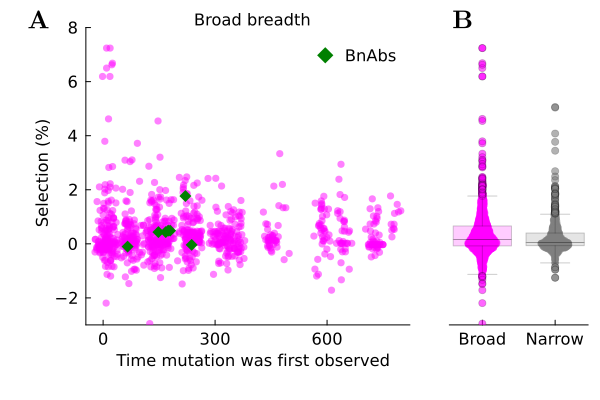

In [187]:
# -------- Make Selection vs time plot for SHIV dsata ---------#
dir_name= "../data/mpl/SHIV.CH505_AA/"
L_fig_tot = 1200
(p1, p_violin, s_BNB_set, date_BNB_set, s_notBNB_set, date_notBNB_set, date_bnAbs_RMs, s_bnAbs_RMs) = get_selection_vs_time_SHIV505(dir_name, L_fig_tot);

l = @layout[a{0.7w} b{0.3w}]
Plots.plot(p1,p_violin, layout=l, size=(L_fig_tot*0.5, 400))
#Plots.savefig("../fig/CH505/Selection_vs_time_RMs_CH505.pdf")

### The following cells obtain trajectories and mutations that involved in glycan and/or resistant to bnAbs. 

In [202]:
# At the directory for the /data/mpl/SHIV.CH505_AA/ there are fies named RM<id>-poly.csv with names of mutaions. 
# Given TF's amino acid sequences, we should be able to identify the mutations that alter the glycan and its trajectories. 

TF_seq_aa_raw = DataFrame(CSV.File("../data/mpl/SHIV.CH505_AA/index-703010505.csv"));
TF_aa = String.(TF_seq_aa_raw.TF)
TF_seq = TF_aa
TF_HXB2 = String.(TF_seq_aa_raw.HXB2);
len_seq = length(TF_HXB2);

In [203]:
individual_set = []
id_set_csv = []; types_set_csv = []
date_set_csv = []; mutation_name_set_csv = [];  freq_set_csv = []
#
date_mutation_was_detected_s_vs_t = []
id_set_s_vs_t = []; types_set_s_vs_t = []; individual_set_s_vs_t = []
mutations_set_s_vs_t = []; selection_set_s_vs_t = []; selection_RMs_set_s_vs_t = []
mutation_resistant_bnAbs = ["R166K", "R169K", "K169E"];
VL_enhancing = ["N130D", "N279D", "K302N", "Y330H", "N334S", "H417R"]
fname_Human_RM = ["703010505", "RM5695", "RM6072", "RM6701", "RM6699", "RM6697", "RM6070", "RM6703"];

csv_raw_RMs = DataFrame(CSV.File("../data/mpl/SHIV.CH505_AA/RMs-poly.csv"));
for i_HRM in 2:length(fname_Human_RM)
    csv_raw_in = DataFrame(CSV.File(@sprintf("../data/mpl/SHIV.CH505_AA/%s-poly.csv", fname_Human_RM[i_HRM])));
    (extracted_integers, index_to_find_integers) = get_date_of_freq(csv_raw_in)
    n_mutation_selected = 0
    for n in 1:length(csv_raw_in.mutation)
        x = csv_raw_in.mutation[n]
        x_splited = split(x, "")
        date_detected = 1
        if(fname_Human_RM[i_HRM] != "RMs")
            date_detected = csv_raw_in.date[n]
        end
        mut_wt = x_splited[1]; mut_mt = x_splited[end]
        i_hxb2 = join(x_splited[2:(end-1)])
        #@printf("%s, %s, %s\n", i_hxb2, mut_wt, mut_mt)
        if( i_hxb2 ∈ TF_HXB2 && (date_detected > 0))
            i_seq = collect(1:len_seq)[TF_HXB2 .== i_hxb2][1]        
            n_mutation_selected += 1
            TF_AA = String(TF_seq[i_seq])
            mut_AA = String(mut_mt)
            (n_glycan_plus, n_glycan_minus) = get_glycosylation_simple_AA(i_seq, mut_AA, TF_seq, len_seq)
            #@printf("%d %d\n", n_glycan_plus, n_glycan_minus)
            
            if(n_glycan_plus>0 || n_glycan_minus>0)
                mutation_id = join([fname_Human_RM[i_HRM], n_mutation_selected], ".")
                
                #types_of_mutation = "glycan" 
                types_of_mutation = "glycan_shield"
                if(n_glycan_minus>0)
                    types_of_mutation = "glycan_holes"
                end
                if(n_glycan_minus>0 && n_glycan_plus>0)
                    types_of_mutation = "glycan_shift"
                end
                
                push!(individual_set_s_vs_t, fname_Human_RM[i_HRM])
                push!(date_mutation_was_detected_s_vs_t, date_detected)
                push!(id_set_s_vs_t, mutation_id)
                push!(types_set_s_vs_t, types_of_mutation)
                push!(mutations_set_s_vs_t, csv_raw_in.mutation[n])
                push!(selection_set_s_vs_t, csv_raw_in.s_MPL[n])
                id_find_mutations = csv_raw_RMs.mutation .== csv_raw_in.mutation[n]
                if(count(id_find_mutations)>0)
                    push!(selection_RMs_set_s_vs_t, csv_raw_RMs.s_MPL[id_find_mutations][1])
                else
                    push!(selection_RMs_set_s_vs_t, 0.0)
                end
                #
                for (date_this, index_this) in zip(extracted_integers, index_to_find_integers)
                    push!(individual_set, fname_Human_RM[i_HRM])
                    date_this_mutation = date_this # this information is used for making trajectory plots.
                    freq_this = csv_raw_in[n, index_this]
                    push!(id_set_csv, mutation_id)
                    push!(types_set_csv, types_of_mutation)
                    push!(date_set_csv, date_this_mutation)
                    push!(mutation_name_set_csv, csv_raw_in.mutation[n])
                    push!(freq_set_csv, freq_this)
                end
            end
        end
        #
        if(x ∈ mutation_resistant_bnAbs && (date_detected > 0))
            n_mutation_selected += 1
            mutation_id = join([fname_Human_RM[i_HRM], n_mutation_selected], ".")
            types_of_mutation = "bnAbs_resistance" 
            push!(individual_set_s_vs_t, fname_Human_RM[i_HRM])
            push!(date_mutation_was_detected_s_vs_t, date_detected)
            push!(id_set_s_vs_t, mutation_id)
            push!(types_set_s_vs_t, types_of_mutation)
            push!(mutations_set_s_vs_t, csv_raw_in.mutation[n])
            push!(selection_set_s_vs_t, csv_raw_in.s_MPL[n])
            id_find_mutations = csv_raw_RMs.mutation .== csv_raw_in.mutation[n]
            if(count(id_find_mutations)>0)
                push!(selection_RMs_set_s_vs_t, csv_raw_RMs.s_MPL[id_find_mutations][1])
            else
                push!(selection_RMs_set_s_vs_t, 0.0)
            end
            for (date_this, index_this) in zip(extracted_integers, index_to_find_integers)
                push!(individual_set, fname_Human_RM[i_HRM])
                date_this_mutation = date_this # this information is used for making trajectory plots.
                freq_this = csv_raw_in[n, index_this]
                push!(id_set_csv, mutation_id)
                push!(types_set_csv, types_of_mutation)
                push!(date_set_csv, date_this_mutation)
                push!(mutation_name_set_csv, csv_raw_in.mutation[n])
                push!(freq_set_csv, freq_this)
            end
        end
        if(x ∈ VL_enhancing && (date_detected > 0))
            n_mutation_selected += 1
            mutation_id = join([fname_Human_RM[i_HRM], n_mutation_selected], ".")
            types_of_mutation = "increase_VL" 
            push!(individual_set_s_vs_t, fname_Human_RM[i_HRM])
            push!(date_mutation_was_detected_s_vs_t, date_detected)
            push!(id_set_s_vs_t, mutation_id)
            push!(types_set_s_vs_t, types_of_mutation)
            push!(mutations_set_s_vs_t, csv_raw_in.mutation[n])
            push!(selection_set_s_vs_t, csv_raw_in.s_MPL[n])
            id_find_mutations = csv_raw_RMs.mutation .== csv_raw_in.mutation[n]
            if(count(id_find_mutations)>0)
                push!(selection_RMs_set_s_vs_t, csv_raw_RMs.s_MPL[id_find_mutations][1])
            else
                push!(selection_RMs_set_s_vs_t, 0.0)
            end
            push!(selection_RMs_set_s_vs_t, )
            for (date_this, index_this) in zip(extracted_integers, index_to_find_integers)
                push!(individual_set, fname_Human_RM[i_HRM])
                date_this_mutation = date_this # this information is used for making trajectory plots.
                freq_this = csv_raw_in[n, index_this]
                push!(id_set_csv, mutation_id)
                push!(types_set_csv, types_of_mutation)
                push!(date_set_csv, date_this_mutation)
                push!(mutation_name_set_csv, csv_raw_in.mutation[n])
                push!(freq_set_csv, freq_this)
            end
        end
    end
end


In [204]:
df = DataFrame(
    individual = individual_set, 
    id = id_set_csv,
    types = types_set_csv,
    date = date_set_csv,
    mutation = mutation_name_set_csv,
    frequency = freq_set_csv
);
CSV.write("../out/for_figures/trajectories_RMs_SHIVCH505.csv", df);
#
df = DataFrame(
    individual = individual_set_s_vs_t, 
    id = id_set_s_vs_t,
    types = types_set_s_vs_t,
    date = date_mutation_was_detected_s_vs_t,
    mutation = mutations_set_s_vs_t,
    selection = selection_set_s_vs_t, 
    selection_RMs = selection_RMs_set_s_vs_t
);
CSV.write("../out/for_figures/selection_RMs_SHIVCH505.csv", df);

## check the number of the common mutations acorss macques. 

In [187]:
csv_raw_RMs = DataFrame(CSV.File("../data/mpl/SHIV.CH505_AA/RMs-poly.csv"));
idx_to_look = extract_integer.(csv_raw_RMs.mutation) .!= 375
csv_raw_RMs = copy(csv_raw_RMs[idx_to_look, :])
selection_vector_set_all = []
for i_HRM in 2:length(fname_Human_RM)
    csv_raw_in = DataFrame(CSV.File(@sprintf("../data/mpl/SHIV.CH505_AA/%s-poly.csv", fname_Human_RM[i_HRM])));
    selection_vector_RM = []
    for n in 1:length(csv_raw_RMs.HXB2)
        mut_in = csv_raw_RMs.mutation[n]
        idx_detected = csv_raw_in.mutation .== mut_in
        if((count(idx_detected) > 0))
            s_in_str = @sprintf("%.6f", csv_raw_in.s_MPL[idx_detected][1])
            push!(selection_vector_RM, s_in_str)
        else
            push!(selection_vector_RM, "NaN")
        end;
    end
    push!(selection_vector_set_all, copy(selection_vector_RM) )
end;

# making csv files having selection coefficients estimated by individual, if there is no mutations then put NaN 
df = DataFrame(
    HXB2=csv_raw_RMs.HXB2,
    PRO=csv_raw_RMs.PRO,
    TF=csv_raw_RMs.TF,
    mutation=csv_raw_RMs.mutation,
    RMs=csv_raw_RMs.s_MPL,
    RM5695=selection_vector_set_all[1],
    RM6072=selection_vector_set_all[2],
    RM6701=selection_vector_set_all[3],
    RM6699=selection_vector_set_all[4],
    RM6697=selection_vector_set_all[5],
    RM6070=selection_vector_set_all[6],
    RM6703=selection_vector_set_all[7]
    ); 
CSV.write("../out/for_figures/selection_RMs_summarizing_all_SHIVCH505.csv", df);

In [193]:
csv_summary = DataFrame(CSV.File("../out/for_figures/selection_RMs_summarizing_all_SHIVCH505.csv"));
n_macaques_threshold = 3;
idx_common_mutations = []
mean_s_set = []
for n in 1:length(csv_raw_RMs.HXB2)
    not_NaN = string.(collect(csv_summary[n, 6:end])) .!="NaN"
    if(count(not_NaN) > n_macaques_threshold)
        push!(idx_common_mutations, true)
        mean_s = mean(csv_summary[n, 5 .+ collect(1:7)[not_NaN] ])
        push!(mean_s_set, mean_s)
    else
        push!(idx_common_mutations, false)
        push!(mean_s_set, "NaN")
    end
        
end
idx_common_mutations = Bool.(idx_common_mutations);

df = DataFrame(
    HXB2=csv_raw_RMs.HXB2[idx_common_mutations],
    PRO=csv_raw_RMs.PRO[idx_common_mutations],
    TF=csv_raw_RMs.TF[idx_common_mutations],
    mutation=csv_raw_RMs.mutation[idx_common_mutations],
    RMs=csv_raw_RMs.s_MPL[idx_common_mutations],
    RM5695=selection_vector_set_all[1][idx_common_mutations],
    RM6072=selection_vector_set_all[2][idx_common_mutations],
    RM6701=selection_vector_set_all[3][idx_common_mutations],
    RM6699=selection_vector_set_all[4][idx_common_mutations],
    RM6697=selection_vector_set_all[5][idx_common_mutations],
    RM6070=selection_vector_set_all[6][idx_common_mutations],
    RM6703=selection_vector_set_all[7][idx_common_mutations], 
    mean_S=mean_s_set[idx_common_mutations]
    ); 
CSV.write("../out/for_figures/selection_RMs_common_mutations_SHIVCH505.csv", df);

In [201]:
csv_in = DataFrame(CSV.File("../out/for_figures/selection_RMs_common_mutations_SHIVCH505.csv"));
idx_sorted = sortperm(csv_in.mean_S, rev=true)
df = DataFrame(
    HXB2=csv_in.HXB2[idx_sorted],
    PRO=csv_in.PRO[idx_sorted],
    TF=csv_in.TF[idx_sorted],
    mutation=csv_in.mutation[idx_sorted],
    RMs=csv_in.RMs[idx_sorted],
    RM5695=csv_in.RM5695[idx_sorted],
    RM6072=csv_in.RM6072[idx_sorted],
    RM6701=csv_in.RM6701[idx_sorted],
    RM6699=csv_in.RM6699[idx_sorted],
    RM6697=csv_in.RM6697[idx_sorted],
    RM6070=csv_in.RM6070[idx_sorted],
    RM6703=csv_in.RM6703[idx_sorted], 
    mean_S=csv_in.mean_S[idx_sorted]
    ); 
CSV.write("../out/for_figures/selection_RMs_common_mutations_SHIVCH505_sorted.csv", df);

In [190]:
df = DataFrame(
    model = [repeat(["BNB"], length([date_BNB_set; date_bnAbs_RMs])); 
            repeat(["nonBNB"], length(date_notBNB_set))],
    date = [date_BNB_set; date_bnAbs_RMs; date_notBNB_set],
    selection = [s_BNB_set; s_bnAbs_RMs; s_notBNB_set],
    bnAbs = [[false for _ in 1:length(s_BNB_set)]; 
     [true for _ in 1:length(s_bnAbs_RMs)];
     [false for _ in 1:length(s_notBNB_set)]]);
#CSV.write("../out/for_figures/fig5AB_selection_vs_time_SHIV.csv", df); 

## Compare enrichment between HIV and SHIV

In [468]:
csv_raw_enrichment_Simian_HIV = DataFrame(CSV.File("../out/enrichment_grouped_SHIV_CH505_multiply_fraction.csv")) ;
csv_raw_enrichment_HIV = DataFrame(CSV.File("../out/enrichment_CH505_multiply_fraction.csv")) ;

In [469]:
field_names = names(csv_raw_enrichment_HIV);
col_typess = unique(csv_raw_enrichment_HIV[:, 1]);

In [470]:
i_type = 10
@printf("type: %s", col_typess[i_type])
idx_to_look = csv_raw_enrichment_HIV[:, 1] .== col_typess[i_type]
this_fraction = csv_raw_enrichment_HIV[idx_to_look, 2]
this_enrichment_HIV = csv_raw_enrichment_HIV.enrichment[idx_to_look]
this_enrichment_SHIV = csv_raw_enrichment_Simian_HIV.enrichment[idx_to_look];
this_log10P_HIV = csv_raw_enrichment_HIV.log10_P[idx_to_look]
this_log10P_SHIV = csv_raw_enrichment_Simian_HIV.log10_P[idx_to_look];

type: Shield

In [471]:
mean_en_HIV_set = []; mean_en_SHIV_set = []
std_en_HIV_set = []; std_en_SHIV_set = []; 
mean_lP_HIV_set = []; mean_lP_SHIV_set = []
std_lP_HIV_set = []; std_lP_SHIV_set = []
idx_to_look = csv_raw_enrichment_HIV[:, 1] .== col_typess[1]
this_enrichment_HIV = csv_raw_enrichment_HIV.enrichment[idx_to_look]
n_items = length(this_enrichment_HIV)
idx_x_percent = collect((n_items-2):(n_items-2))

for i_type in 1:length(col_typess)

    idx_to_look = csv_raw_enrichment_HIV[:, 1] .== col_typess[i_type]
    this_fraction = csv_raw_enrichment_HIV[idx_to_look, 2]
    this_enrichment_HIV = csv_raw_enrichment_HIV.enrichment[idx_to_look]
    this_enrichment_SHIV = csv_raw_enrichment_Simian_HIV.enrichment[idx_to_look];
    this_log10P_HIV = csv_raw_enrichment_HIV.log10_P[idx_to_look]
    this_log10P_SHIV = csv_raw_enrichment_Simian_HIV.log10_P[idx_to_look];
    
    cor_en = cor(this_enrichment_HIV, this_enrichment_SHIV)
    cor_lP = cor(this_log10P_HIV, this_log10P_SHIV)
    #@printf("ρ_en: %.4f, ρ_lP: %.4f", cor_en, cor_lP)
    p1 = scatter(100*this_fraction, this_enrichment_HIV, label="HIV")
    scatter!(100*this_fraction, this_enrichment_SHIV, label="SHIV", 
        xlabel="fraction (%)", ylabel="enrichment", title=@sprintf("%s (cor=%.2f)", col_typess[i_type], cor_en))
    p2 = scatter(100*this_fraction, this_log10P_HIV,)
    scatter!(100*this_fraction, this_log10P_SHIV .- 1, legend=:false, 
        xlabel="fraction (%)", ylabel="log P value", title=@sprintf("%s (cor=%.2f)", col_typess[i_type], cor_lP))
    
    cor_en = cor(this_enrichment_HIV[idx_x_percent], this_enrichment_SHIV[idx_x_percent] )
    cor_lP = cor(this_log10P_HIV[idx_x_percent], this_log10P_SHIV[idx_x_percent] .- 1)
    #@printf("ρ_en: %.4f, ρ_lP: %.4f", cor_en, cor_lP)
    p3 = scatter(100*this_fraction[idx_x_percent], this_enrichment_HIV[idx_x_percent], label="HIV")
    scatter!(100*this_fraction[idx_x_percent], this_enrichment_SHIV[idx_x_percent], label="SHIV", 
        xlabel="fraction (%)", ylabel="enrichment", title=@sprintf("%s (cor=%.2f)", col_typess[i_type], cor_en))
    p4 = scatter(100*this_fraction[idx_x_percent], this_log10P_HIV[idx_x_percent],)
    scatter!(100*this_fraction[idx_x_percent], this_log10P_SHIV[idx_x_percent] .-1, legend=:false, 
        xlabel="fraction (%)", ylabel="log P value", title=@sprintf("%s (cor=%.2f)", col_typess[i_type], cor_lP))
    Plots.plot(p1,p2, p3, p4, layout=(2,2), size=(700, 600))
    Plots.savefig(@sprintf("../fig_temp/compare_HIV_SHIV_%s.pdf", col_typess[i_type]))

    
    mean_en_HIV = median(this_enrichment_HIV[idx_x_percent]) 
    mean_en_SHIV = median(this_enrichment_SHIV[idx_x_percent]) 
    mean_lP_HIV = median(this_log10P_HIV[idx_x_percent]) 
    mean_lP_SHIV = median(this_log10P_SHIV[idx_x_percent]) 
    
    std_en_HIV = std(this_enrichment_HIV[idx_x_percent]) 
    std_en_SHIV = std(this_enrichment_SHIV[idx_x_percent]) 
    std_lP_HIV = std(this_log10P_HIV[idx_x_percent]) 
    std_lP_SHIV = std(this_log10P_SHIV[idx_x_percent]) 

    push!(mean_en_HIV_set, mean_en_HIV)
    push!(mean_en_SHIV_set, mean_en_SHIV)
    push!(mean_lP_HIV_set, mean_lP_HIV)
    push!(mean_lP_SHIV_set, mean_lP_SHIV)

    push!(std_en_HIV_set, std_en_HIV)
    push!(std_en_SHIV_set, std_en_SHIV)
    push!(std_lP_HIV_set, std_lP_HIV)
    push!(std_lP_SHIV_set, std_lP_SHIV)
end

In [472]:
marker_types = [:circle, :square, :diamond, :cross, :star5, :hexagon, :heptagon, :x, :utriangle, :pentagon, :star6, :dtriangle]
my_ms = 7
i_type = 1
p1 = scatter([mean_en_HIV_set[i_type]], [mean_en_SHIV_set[i_type]], title=L"\mathrm{Enrichment}", ms=my_ms, m=marker_types[i_type], 
    label=col_typess[i_type], legend=:outerright, xaxis=:log, yaxis=:log, xlabel="HIV", ylabel="SHIV")
cor_en = cor(log.(mean_en_HIV_set), log.(mean_en_SHIV_set))
annotate!(3, 60,text(@sprintf("r=%.2f", cor_en), ) )
 
    p2 = scatter([mean_lP_HIV_set[1]], [mean_lP_SHIV_set[1]] , title=L"\log P", ms=my_ms, m=marker_types[i_type], 
    label=col_typess[i_type], legend=:outerright, xlabel="HIV", ylabel="SHIV")
cor_lP = cor(mean_lP_HIV_set, mean_lP_SHIV_set)
annotate!(-6, -4, text(@sprintf("r=%.2f", cor_lP), ) )
for i_type in 2:length(col_typess)
    scatter!(p1[1], [mean_en_HIV_set[i_type]], [mean_en_SHIV_set[i_type]], label=col_typess[i_type], ms=my_ms, m=marker_types[i_type], )
    scatter!(p2[1], [mean_lP_HIV_set[i_type]], [mean_lP_SHIV_set[i_type]], label=col_typess[i_type], ms=my_ms, m=marker_types[i_type], )
end;


In [ ]:
Plots.plot(p1, p2, layout=(1,2), size=(1000, 400), margin=4mm, grid=:false) ;
#Plots.savefig("../fig_temp/compare_HIV_SHIV_enrichment_Pvalue.pdf")

## This is temporal to find the pattern. 

In [340]:
#idx_x_percent = csv_raw_enrichment_HIV.fraction .== 0.2;


In [355]:
csv_raw_enrichment_Simian_HIV = DataFrame(CSV.File("../out/enrichment_grouped_SHIV_CH505_multiply_fraction.csv")) ;
csv_raw_enrichment_HIV = DataFrame(CSV.File("../out/enrichment_CH505_multiply_fraction.csv")) ;
field_names = names(csv_raw_enrichment_HIV);
col_typess = unique(csv_raw_enrichment_HIV[:, 1]);
i_type = 10
@printf("type: %s", col_typess[i_type])
idx_to_look = csv_raw_enrichment_HIV[:, 1] .== col_typess[i_type]
this_fraction = csv_raw_enrichment_HIV[idx_to_look, 2]
this_enrichment_HIV = csv_raw_enrichment_HIV.enrichment[idx_to_look]
this_enrichment_SHIV = csv_raw_enrichment_Simian_HIV.enrichment[idx_to_look];
this_log10P_HIV = csv_raw_enrichment_HIV.log10_P[idx_to_look]
this_log10P_SHIV = csv_raw_enrichment_Simian_HIV.log10_P[idx_to_look];

type: Shield

In [362]:
mean_en_HIV_set = []; mean_en_SHIV_set = []
std_en_HIV_set = []; std_en_SHIV_set = []; 
mean_lP_HIV_set = []; mean_lP_SHIV_set = []
std_lP_HIV_set = []; std_lP_SHIV_set = []
idx_to_look = csv_raw_enrichment_HIV[:, 1] .== col_typess[1]
this_enrichment_HIV = csv_raw_enrichment_HIV.enrichment[idx_to_look]
n_items = length(this_enrichment_HIV)

idx_x_percent = collect((n_items-0):(n_items-0))

for i_type in 1:length(col_typess)

    idx_to_look = csv_raw_enrichment_HIV[:, 1] .== col_typess[i_type]
    this_fraction = csv_raw_enrichment_HIV[idx_to_look, 2]
    this_enrichment_HIV = csv_raw_enrichment_HIV.enrichment[idx_to_look]
    this_enrichment_SHIV = csv_raw_enrichment_Simian_HIV.enrichment[idx_to_look];
    this_log10P_HIV = csv_raw_enrichment_HIV.log10_P[idx_to_look]
    this_log10P_SHIV = csv_raw_enrichment_Simian_HIV.log10_P[idx_to_look];
    
    mean_en_HIV = median(this_enrichment_HIV[idx_x_percent]) 
    mean_en_SHIV = median(this_enrichment_SHIV[idx_x_percent]) 
    mean_lP_HIV = median(this_log10P_HIV[idx_x_percent]) 
    mean_lP_SHIV = median(this_log10P_SHIV[idx_x_percent]) 
    
    std_en_HIV = std(this_enrichment_HIV[idx_x_percent]) 
    std_en_SHIV = std(this_enrichment_SHIV[idx_x_percent]) 
    std_lP_HIV = std(this_log10P_HIV[idx_x_percent]) 
    std_lP_SHIV = std(this_log10P_SHIV[idx_x_percent]) 

    push!(mean_en_HIV_set, mean_en_HIV)
    push!(mean_en_SHIV_set, mean_en_SHIV)
    push!(mean_lP_HIV_set, mean_lP_HIV)
    push!(mean_lP_SHIV_set, mean_lP_SHIV)

    push!(std_en_HIV_set, std_en_HIV)
    push!(std_en_SHIV_set, std_en_SHIV)
    push!(std_lP_HIV_set, std_lP_HIV)
    push!(std_lP_SHIV_set, std_lP_SHIV)
end

In [363]:
marker_types = [:circle, :square, :diamond, :cross, :star5, :hexagon, :heptagon, :x, :utriangle, :pentagon, :star6, :dtriangle]
my_ms = 7
i_type = 1
p1 = scatter([mean_en_HIV_set[i_type]], [mean_en_SHIV_set[i_type]], title=L"\mathrm{Enrichment (CH505)}", ms=my_ms, m=marker_types[i_type], 
    label=col_typess[i_type], legend=:outerright, xaxis=:log, yaxis=:log, xlabel="HIV", ylabel="SHIV")
cor_en = cor(log.(mean_en_HIV_set), log.(mean_en_SHIV_set))
annotate!(3, 60,text(@sprintf("r=%.2f", cor_en), ) )
for i_type in 2:(length(col_typess)-5)
    scatter!(p1[1], [mean_en_HIV_set[i_type]], [mean_en_SHIV_set[i_type]], label=col_typess[i_type], ms=my_ms, m=marker_types[i_type], )
end;


In [364]:
csv_raw_enrichment_Simian_HIV = DataFrame(CSV.File("../out/enrichment_grouped_SHIV_CH848_multiply_fraction.csv")) ;
csv_raw_enrichment_HIV = DataFrame(CSV.File("../out/enrichment_CH848_multiply_fraction.csv")) ;
field_names = names(csv_raw_enrichment_HIV);
col_typess = unique(csv_raw_enrichment_HIV[:, 1]);
i_type = 10
@printf("type: %s", col_typess[i_type])
idx_to_look = csv_raw_enrichment_HIV[:, 1] .== col_typess[i_type]
this_fraction = csv_raw_enrichment_HIV[idx_to_look, 2]
this_enrichment_HIV = csv_raw_enrichment_HIV.enrichment[idx_to_look]
this_enrichment_SHIV = csv_raw_enrichment_Simian_HIV.enrichment[idx_to_look];
this_log10P_HIV = csv_raw_enrichment_HIV.log10_P[idx_to_look]
this_log10P_SHIV = csv_raw_enrichment_Simian_HIV.log10_P[idx_to_look];

type: Shield

In [365]:
mean_en_HIV_set = []; mean_en_SHIV_set = []
std_en_HIV_set = []; std_en_SHIV_set = []; 
mean_lP_HIV_set = []; mean_lP_SHIV_set = []
std_lP_HIV_set = []; std_lP_SHIV_set = []
idx_to_look = csv_raw_enrichment_HIV[:, 1] .== col_typess[1]
this_enrichment_HIV = csv_raw_enrichment_HIV.enrichment[idx_to_look]
n_items = length(this_enrichment_HIV)
#idx_x_percent = collect((n_items-2):(n_items-2))

for i_type in 1:length(col_typess)

    idx_to_look = csv_raw_enrichment_HIV[:, 1] .== col_typess[i_type]
    this_fraction = csv_raw_enrichment_HIV[idx_to_look, 2]
    this_enrichment_HIV = csv_raw_enrichment_HIV.enrichment[idx_to_look]
    this_enrichment_SHIV = csv_raw_enrichment_Simian_HIV.enrichment[idx_to_look];
    this_log10P_HIV = csv_raw_enrichment_HIV.log10_P[idx_to_look]
    this_log10P_SHIV = csv_raw_enrichment_Simian_HIV.log10_P[idx_to_look];
    
    mean_en_HIV = median(this_enrichment_HIV[idx_x_percent]) 
    mean_en_SHIV = median(this_enrichment_SHIV[idx_x_percent]) 
    mean_lP_HIV = median(this_log10P_HIV[idx_x_percent]) 
    mean_lP_SHIV = median(this_log10P_SHIV[idx_x_percent]) 
    
    std_en_HIV = std(this_enrichment_HIV[idx_x_percent]) 
    std_en_SHIV = std(this_enrichment_SHIV[idx_x_percent]) 
    std_lP_HIV = std(this_log10P_HIV[idx_x_percent]) 
    std_lP_SHIV = std(this_log10P_SHIV[idx_x_percent]) 

    push!(mean_en_HIV_set, mean_en_HIV)
    push!(mean_en_SHIV_set, mean_en_SHIV)
    push!(mean_lP_HIV_set, mean_lP_HIV)
    push!(mean_lP_SHIV_set, mean_lP_SHIV)

    push!(std_en_HIV_set, std_en_HIV)
    push!(std_en_SHIV_set, std_en_SHIV)
    push!(std_lP_HIV_set, std_lP_HIV)
    push!(std_lP_SHIV_set, std_lP_SHIV)
end

In [366]:
marker_types = [:circle, :square, :diamond, :cross, :star5, :hexagon, :heptagon, :x, :utriangle, :pentagon, :star6, :dtriangle]
my_ms = 7
i_type = 1
p2 = scatter([mean_en_HIV_set[i_type]], [mean_en_SHIV_set[i_type]], title=L"\mathrm{Enrichment (CH848)} ", ms=my_ms, m=marker_types[i_type], 
    label=col_typess[i_type], legend=:outerright, xaxis=:log, yaxis=:log, xlabel="HIV", ylabel="SHIV")
cor_en = cor(log.(mean_en_HIV_set), log.(mean_en_SHIV_set))
annotate!(6, 60,text(@sprintf("r=%.2f", cor_en), ) )
for i_type in 2:(length(col_typess)-5)
    scatter!(p2[1], [mean_en_HIV_set[i_type]], [mean_en_SHIV_set[i_type]], label=col_typess[i_type], ms=my_ms, m=marker_types[i_type], )
end;


In [367]:
Plots.plot(p1, p2, layout=(1,2), size=(1000, 400), margin=4mm, grid=:false) 
Plots.savefig("../fig_temp/compare_HIV_SHIV_enrichment_Pvalue_fraction_0.01.pdf")
#Plots.savefig("../fig_temp/compare_HIV_SHIV_enrichment_Pvalue_fraction_0.05_v2.pdf")

"/net/dali/home/barton/kais/submission/HIV_Coevolution/fig_temp/compare_HIV_SHIV_enrichment_Pvalue_fraction_0.01.pdf"

In [355]:
csv_raw_RM5695 = DataFrame(CSV.File("../out/RM5695-3-poly_sorted_with_mutant.csv"));
csv_raw_RM6070 = DataFrame(CSV.File("../out/RM6070-3-poly_sorted_with_mutant.csv"));
csv_raw_RM6072 = DataFrame(CSV.File("../out/RM6072-3-poly_sorted_with_mutant.csv"));
csv_raw_RM6701 = DataFrame(CSV.File("../out/RM6701-3-poly_sorted_with_mutant.csv"));
csv_raw_RM6703 = DataFrame(CSV.File("../out/RM6703-3-poly_sorted_with_mutant.csv"));
csv_raw_RM6697 = DataFrame(CSV.File("../out/RM6697-3-poly_sorted_with_mutant.csv"));
csv_raw_RM6699 = DataFrame(CSV.File("../out/RM6699-3-poly_sorted_with_mutant.csv"));


In [360]:
@printf("%s %s %d\n", "RM5695", join(sort(unique(csv_raw_RM5695.detected_date)), " "), length(sort(unique(csv_raw_RM5695.detected_date))));
@printf("%s %s %d\n", "RM6070", join(sort(unique(csv_raw_RM6070.detected_date)), " "), length(sort(unique(csv_raw_RM6070.detected_date))));
@printf("%s %s %d\n", "RM6072", join(sort(unique(csv_raw_RM6072.detected_date)), " "), length(sort(unique(csv_raw_RM6072.detected_date))))
@printf("%s %s %d\n", "RM6701", join(sort(unique(csv_raw_RM6701.detected_date)), " "), length(sort(unique(csv_raw_RM6701.detected_date))))
@printf("%s %s %d\n", "RM6703", join(sort(unique(csv_raw_RM6703.detected_date)), " "), length(sort(unique(csv_raw_RM6703.detected_date))))
@printf("%s %s %d\n", "RM6697", join(sort(unique(csv_raw_RM6697.detected_date)), " "), length(sort(unique(csv_raw_RM6697.detected_date))))
@printf("%s %s %d\n", "RM6699", join(sort(unique(csv_raw_RM6699.detected_date)), " "), length(sort(unique(csv_raw_RM6699.detected_date))));


RM5695 14 28 84 112 168 336 448 7
RM6070 70 140 224 252 4
RM6072 27 70 140 224 252 308 366 476 588 643 728 783 12
RM6701 84 168 224 392 4
RM6703 84 168 336 3
RM6697 84 112 224 392 560 5
RM6699 84 168 224 392 4


## The following cells are temporal analysis comparing the sequence similarity between T/F sequences for SHiV.CH505 and SHiV.CH848. 

In [ ]:
function number_to_alphabet(n)
    return Char(n + 96)
end

In [13]:
(MSA, seq_headder, seq_len) = read_fastafile("../data/temporal_analysis/SHIVCH505_SHIVCH848.pro.fasta");

In [19]:
idx_nongap = (MSA[2] .!= "-") .|| (MSA[3] .!= "-");

In [24]:
hamming_dist_SHIV505_SHIV848 = sum(1 .- kr.(MSA[2][idx_nongap], MSA[3][idx_nongap]));

In [32]:
fraction_hamming_dist_SHIV505_SHIV848 = hamming_dist_SHIV505_SHIV848 / count(idx_nongap)
@printf("similarity = %.1f", (1 - fraction_hamming_dist_SHIV505_SHIV848) * 100);

similarity = 79.1

In [42]:
hxb2_index = []
aa_CH505 = []; aa_CH848 = []
hxb2_walker = 0; gap_walker = 0 
for x in MSA[1]
    if(x!="-")
        hxb2_walker += 1
        gap_walker = 0
    else
        gap_walker += 1
    end
    if(gap_walker == 0)
        push!(hxb2_index, hxb2_walker)
    else
        push!(hxb2_index, @sprintf("%d%s", hxb2_walker, number_to_alphabet(gap_walker)))
    end
end
    
        

In [46]:
df = DataFrame(
    HXB2=hxb2_index, 
    TF_CH505=MSA[2], 
    TF_CH848=MSA[3]);
CSV.write("../out/for_figures/check_TFs_SHIV_CH505_CH848.csv", df); 